# Multi terrain probabistic sensing

# About this file

This file is to use the functionalities of the classes defined in the other file.

## Things to be done here

1) write algorithm for agent3, agent4 <br>
2) if object_matrix is knowledge base, then lets rename it to knowledge base to avoid confusion and have unambiguous variable names.<br>
3) Import A* code into this file.

## Things done here

1) declared the set of global variables required
2) renamed object_matrix to knowledge_base

In [90]:
%run a_star.ipynb
import numpy as np
%run agent_6.ipynb

import random

In [91]:
maze_size = 10
probability = 0.3
global agent_gridworld
global full_grid_world_matrix
global visited_list
global terrain_matrix
global agent6_terrain_matrix

agent_gridworld = np.matrix(np.zeros((maze_size, maze_size)))
terrain_matrix = np.matrix(np.zeros((maze_size, maze_size)))
full_grid_world_matrix = np.full((maze_size, maze_size), 0)

# knowledge_base is used to store the inference/ knowledge base of objects(nodes) with it's respective indices
knowledge_base = np.array([agent_6(int(item/maze_size),item%maze_size,maze_size) for item in range(maze_size * maze_size)]).reshape(maze_size, maze_size)


In [113]:
class Agent6:
    
    def __init__(self,belief):
        self.belief = belief
        self.type = 0
        self.visited = False

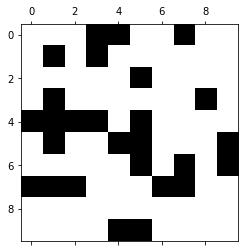

In [114]:
# full_grid_world_matrix = populateMatrix(maze_size, probability)

#### Use either the above line in the block or the below set of lines of code to get the full grid world

full_grid_world_matrix = [[0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
        [1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]]

full_grid_world_matrix = np.matrix(full_grid_world_matrix)
plt.spy(full_grid_world_matrix)

In [94]:
def initialize_terrain_matrix(maze_size):
    n = 10
    p = 1

    # generates number between 0-2
    global terrain_matrix
    np_array = np.random.randint(3, size=100)

#     block = lambda x: 2 if x>p else (1 if x<p else 0)
#     vectorized_block = np.vectorize(block)
#     np_array = vectorized_block(np_array).reshape(n,n)
    terrain_matrix = np.asmatrix(np_array).reshape(n,n)
#     print("The probability of finding forest terrains = ", np.count_nonzero(terrain_matrix == 2)/(n*n))
#     print("The probability of finding hilly terrains = ", np.count_nonzero(terrain_matrix == 1)/(n*n))
#     print("The probability of finding flat terrains = ", np.count_nonzero(terrain_matrix == 0)/(n*n))

    return terrain_matrix

In [95]:
initialize_terrain_matrix(10)
print(terrain_matrix)

[[1 1 0 2 0 0 1 0 1 2]
 [2 2 2 2 1 0 1 1 0 1]
 [1 1 1 1 0 2 0 2 1 0]
 [1 0 0 0 1 0 2 2 0 1]
 [2 0 2 0 0 1 1 2 0 1]
 [1 0 2 1 2 2 0 1 0 2]
 [0 1 0 1 2 1 0 0 2 1]
 [0 0 2 0 1 1 0 0 2 0]
 [0 0 2 2 0 0 0 0 1 2]
 [1 0 0 2 2 1 1 0 1 1]]


In [118]:
def initialize_all_matrices(maze_size):
    global terrain_matrix   
    global full_grid_world_matrix
    global block_unblock_matrix
    global agent_gridworld
    global agent6_terrain_matrix
    
    
    initialize(maze_size,p)
    full_grid_world_matrix = block_unblock_matrix
    agent_gridworld = np.full((maze_size, maze_size), 0)
    terrain_matrix = initialize_terrain_matrix(maze_size)
#     agent6_terrain_matrix = np.array(Agent6()).reshape(maze_size, maze_size)
    agent6_terrain_matrix = np.array([Agent6(1/(maze_size*maze_size)) for item in range(maze_size * maze_size)]).reshape(maze_size, maze_size)



In [121]:
# initialize_all_matrices(10)
# print(agent6_terrain_matrix[0,0].belief,agent6_terrain_matrix[0,0].type,agent6_terrain_matrix[0,0].visited)

0.01 0 False


# Code for Agent 6 goes here

In [10]:
def agent6(maze_size, source): # using this name for the lack of a better name. please change.
    global agent_gridworld
    global full_grid_world_matrix
    global terrain_matrix

    _,_,_,path = astar(source,agent_gridworld,goal)
    path = path[::-1]
    print('path', path)
    goal_reached = False

    if path == []:
        return visited_list, number_of_bumps, infered_list, goal_reached

    for node in path:
        row = node[0]
        column = node[1]
        knowledge_base[row][column].blocked = helper_matrix[row][col]

In [123]:
def run_agent_6(source,target):
    global terrain_matrix   
    global full_grid_world_matrix
    global block_unblock_matrix
    global agent_gridworld
    global agent6_terrain_matrix
    
    target_reached = False
    while not target_reached:
        goal = getMaxProbabilityCell()
        _,_,_,path = astar(source, agent_gridworld, goal)
                
        for node in path:
            terrain_type = check_type(node)
            update_agent6_terrain_matrix()
            if terrain_type == 3:
                agent6_terrain_matrix[node[0],node[1]].belief = 0
                update_probabilites_when_blocked_formula()
                break    
        target_reached = examine(path[-1])

        if (not target_reached)
            update_probabilites_when_unblocked_formula()
            
      
            
        

SyntaxError: unexpected EOF while parsing (<ipython-input-123-a29f56de302d>, line 16)

In [124]:
def set_valid_source_target():
    global full_grid_world_matrix
    global terrain_matrix
    global maze_size
    initialize_all_matrices(maze_size)
    target = list(np.random.randint(maze_size,size=2))
    if terrain_matrix[target[0],target[1]] == 3:
        terrain_matrix[target[0],target[1]]=np.random.randint(3,size=1)
        
    source = list(np.random.randint(maze_size,size=2))
    if terrain_matrix[source[0],source[1]] == 3:
        terrain_matrix[source[0],source[1]]=np.random.randint(3,size=1)
    
    _,_,_,path = astar(source,target,full_grid_world_matrix)
    if (len(path) == 0):
            return set_valid_source_target()
    
    return [source,target]

# Main function

In [125]:
if __name__ == "__main__":
    global full_grid_world_matrix
    global terrain_matrix
    global maze_size
    
    source,target=set_valid_source_target()
    print(source,target)
    print(terrain_matrix)
    run_agent_6(source,target)
    
    
    
    
        
    

    

TypeError: astar() takes 2 positional arguments but 3 were given